#  Nonlinear Conjugate Gradient Methods

In this discussion, we will explore
* Nonlinear conjugate gradient methods

---

## Linear Conjugate Gradient Method

Last time we described the **conjugate gradient method** for solving a system of linear equations $Q\mathbf{x}=\mathbf{b}$, which can be interpreted as minimizing a quadratic function, $f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TQ\mathbf{x} - \mathbf{b}^T\mathbf{x}$. Recall that the conjugate gradient method seeks to mimic the property of Quasi-Newton methods where each new step is $Q$-conjugate to all previous steps, leading to convergence in $n$ steps if $\mathbf{x}\in\mathbb{R}^n$. It does so in the following way:

1. Set $\mathbf{p}_0 = -\nabla f_0$, as in steepest descent.
2. Determine $\alpha_k$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
3. Set $\mathbf{p}_{k+1} = -\nabla f_{k+1} + \beta_k\mathbf{p}_k$, where $\beta_k$ is chosen so that $\mathbf{p}_{k+1}$ and $\mathbf{p}_k$ are conjugate in some sense.
4. Repeat 2-3 until convergence.

If $f$ is quadratic, we showed the optimal values for the parameters $\alpha_k$ and $\beta_k$ were given by

$$ \alpha_k = -\frac{\mathbf{p}_k^T\nabla f_k}{\mathbf{p}_k^TQ\mathbf{p}_k},\qquad \beta_k = \frac{\mathbf{p}_k^TQ\nabla f_{k+1}}{\mathbf{p}_k^TQ\mathbf{p}_k} $$

and, after some efficiency considerations, we outlined an efficient version of the linear conjugate gradient method:

1. Set $\mathbf{r}_0= Q\mathbf{x}_0-\mathbf{b}$ (often called the [residual](https://en.wikipedia.org/wiki/Residual_(numerical_analysis))), $\mathbf{p}_0 = -\mathbf{r}_0$.
2. Calculate and store $\mathbf{y}_k=Q\mathbf{p}_k$.
3. Set $\alpha_k = \dfrac{\mathbf{r}_k^T\mathbf{r}_k}{\mathbf{p}_k^T\mathbf{y}_k}$ and update $\mathbf{x}_{k+1} = \mathbf{x}_k + \alpha_k\mathbf{p}_k$.
4. Update $\mathbf{r}_{k+1} = \mathbf{r}_k + \alpha_k\mathbf{y}_k$.
5. Set $\beta_k =\dfrac{\mathbf{r}_{k+1}^T\mathbf{r}_{k+1}}{\mathbf{r}_k^T\mathbf{r}_k}$ and update $\mathbf{p}_{k+1} = -\mathbf{r}_{k+1} + \beta_k\mathbf{p}_k$.
6. Repeat 2-5 until convergence.

This algorithm was shown to indeed converge in at most $n$ steps.

## Nonlinear conjugate gradient methods

If the objective function is not quadratic, much of the argument leading to the above result breaks down. We see straight away that both $\alpha_k$ and $\beta_k$ depend on $Q$, which does not exist for non-quadratic functions. However, since we know $Q$ is just the Hessian matrix for a quadratic function, we can make some clever substitutions in the above to recover some nice convergence results even for non-quadratic functions.

First, we note that since $\alpha_k$ is just the step size and not absolutely crucial to the $Q$-conjugacy of the CG method, we could simply replace it with any of the previously introduced step size selection algorithms, e.g. exact line search or even inexact line searches like backtracking. Though this may delay convergence slightly due to suboptimal steps, it should not have a major impact on the convergence rate. This is an easy fix.

Another easy fix is the gradient update (step 4 above), which can no longer take advantage of the recursive formula; however, we may simply revert to the slightly less efficient form of just calculating $\nabla f_{k+1}$ directly with no major impact on convergence.

What is not as straightforward to generalize is the parameter $\beta_k$, which was cruial to the $Q$-conjugacy of step sizes for quadratic functions. There are several variations of nonlinear conjugate gradient methods, each corresponding to a different calculation of the coefficient $\beta_k$. We discuss each of these below.

### Hestenes-Stiefel (HS) Formula

Since the only time $Q$ shows up in the formula for $\beta_k$ in the linear CG method is attached to $\mathbf{p}_k$, finding a substitute for that vector would suffice. Hestenes and Stiefel proposed a simple substitution based on the form of the recursive update of the gradient, $\nabla f_{k+1} = \nabla f_k + \alpha_kQ\mathbf{p}_k$, from the linear CG method. Though this does not hold for a general non-quadratic function, replacing $Q$ with the Hessian matrix reveals that this can be treated as an approximation to the updated gradient. Rearranging this update equation yields

$$ Q\mathbf{p}_k = \frac{\nabla f_{k+1} - \nabla f_k}{\alpha_k} $$

and thus we set

$$ \beta_k = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\mathbf{p}_k^T(\nabla f_{k+1} - \nabla f_k)} $$

noting that the factor of $\frac{1}{\alpha_k}$ cancels out. One immediately recognized drawback of this substitution is the subtraction in the denominator, which may vanish if the gradient is equal or very close to it in consecutive steps.

### Polak-Ribière (PR) Formula

As an attempt to remedy the vanishing denominator issue with the HS formula for $\beta_k$, Polak and Ribière proposed to rely further on the results from the linear CG method, namely that the new gradient $\nabla f_{k+1}$ is orthogonal to all previous search directions $\mathbf{p}_j$, $j\le k$. This was only true for quadratic functions, but since we're already approximating, we may as well continue the approximation. Expanding the denominator, then, leads to the first term vanishing. Furthermore, since $\mathbf{p}_k = -\nabla f_k + \beta_{k-1}\mathbf{p}_{k-1}$, we get further cancellation. That is,

$$ \mathbf{p}_k^T(\nabla f_{k+1} - \nabla f_k) = -\mathbf{p}_k^T\nabla f_k = -(-\nabla f_k + \beta_{k-1}\mathbf{p}_{k-1})^T\nabla f_k = \nabla f_k^T\nabla f_k $$

and thus the PR formula for $\beta_k$ is given by

$$ \beta_k = \frac{(\nabla f_{k+1} - \nabla f_k)^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$


### Fletcher-Reeves (FR) Formula

Fletcher and Reeves further proposed to continue the approximation by simply using the final form of $\beta_k$ in the efficient implementation of the linear CG method,

$$ \beta_k = \frac{\nabla f_{k+1}^T\nabla f_{k+1}}{\nabla f_k^T\nabla f_k} $$

### Comparisons

Despite the vanishing denominator issue with the HS formula, since it involves the fewest approximations, it is actually the closest to "correct", in the sense that if the step size selection algorithm for $\alpha_k$ is suboptimal (e.g. backtracking), experimental results show that HS typically performs better than FR or PR. Indeed even if $\alpha_k$ is chosen so that it satisfies *both* Wolfe conditions, the FR formula does not guarantee that $\mathbf{p}_{k+1}$ is a descent direction. This is true since

$$ \nabla f_{k+1}^T\mathbf{p}_{k+1} = -\nabla f_{k+1}^T\nabla f_{k+1} + \beta_k\nabla f_{k+1}^T\mathbf{p}_k $$

and the dot product in the second term may be negative, even if $\mathbf{p}_k$ was a descent direction at $\mathbf{x}_k$. If, however, $\alpha_k$ is chosen to satisfy the *strong* Wolfe conditions, a modification to Wolfe II which requires the *absolute value* of the gradient at the new point is less steep than the old point (see diagram), the FR formula can be shown to be a descent direction. The PR formula, however, fares even worse, not even guaranteeing descent when the srong Wolfe conditions are satisfied. However, a slight modification to PR, called PR+, does guarantee descent, setting

$$ \beta_k^+ = \max\{0,\beta_k^{PR}\} $$

i.e. only accepting PR's $\beta_k$ if it is positive, otherwise setting $\beta_k=0$. Note that if $\beta_k=0$, $\mathbf{p}_{k+1}=-\nabla f_k$, equivalent to steepest descent, so this essentially "resets" CG at the current iteration.

<img src="https://d3i71xaburhd42.cloudfront.net/6d5eb4e2e15787f0e074e78d4e4705527e6d3a13/27-Figure2.3-1.png" width=75% />

Regardless of which formula is chosen for $\beta_k$, something all nonlinear CG methods have in common is that the "$Q$-conjugacy" of the search directions tends to deteriorate as the number of iterations grows large, leading to gradually decaying performance if left unmitigated. This is expected since the Hessian is not a constant matrix for non-quadratic functions, so requiring conjugacy at one step does not guarantee conjugacy for all previous steps. For this reason, most implementations of CG on non-quadratic functions involve "restarting" (i.e. setting $\beta_k=0$) after a fixed number of iterations, typically $n$ or $n+1$. The rationale here is that if a function is approximately quadratic near its minimizer (most are), eventually the iteration will enter the quadratic region, at which point, restarting CG would be expected to lead to convergence in a finite number of steps.

---

## Implementation

Below, we implement several versions of nonlinear CG on our favorite Rosenbrock function and explore the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a,b = 1,25    # parameters for Rosenbrock function
f = lambda x,y: (a-x)**2+b*(y-x**2)**2
Df = lambda x,y: np.array([2*(x-a)-4*b*x*(y-x**2),
                           2*b*(y-x**2)])

x0,y0 = 1.5,2    # initial point for all methods

In [3]:
def WolfeI(alpha,f,x,dx,p,c1=0.1):
    '''Return True/False if Wolfe condition I is satisfied for the given alpha'''
    LHS = f(x[0]+alpha*p[0], x[1]+alpha*p[1])
    RHS = f(x[0],x[1])+c1*alpha*np.dot(dx,p)
    return LHS <= RHS

In [4]:
def HS_beta(Dfk,Dfk1,pk):
    return ((Dfk1-Dfk)@Dfk1) / (pk@(Dfk1-Dfk))

In [5]:
def PR_beta(Dfk,Dfk1):
    return ((Dfk1-Dfk)@Dfk1) / (Dfk@Dfk)

In [6]:
def FR_beta(Dfk,Dfk1):
    return (Dfk1@Dfk1) / (Dfk@Dfk)

In [7]:
def plot_path(path, func, title, window=[0,3,0,3], numContours=50, skip=1):
    '''Plots path defined in (N,2) array "path" on a contour plot of "func" in window "window"'''
    plt.figure(figsize=(10,10))
    X = np.linspace(window[0],window[1],300)
    Y = np.linspace(window[2],window[3],300)
    Xmesh, Ymesh = np.meshgrid(X,Y)
    Z = func(Xmesh,Ymesh)
    CS = plt.contour(Xmesh, Ymesh, Z, numContours, cmap='jet')
    plt.clabel(CS,inline_spacing=0,fmt='%d')
    plt.axis(window)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)

    for i in range(path.shape[0]-1): # iterate through steps
        if i%skip==0:
            # only plot arrows every "skip" iterations
            plt.arrow(path[i,0],path[i,1],path[i+1,0]-path[i,0],path[i+1,1]-path[i,1],
                      color='k',length_includes_head=True)
    plt.show()

In [8]:
%%time
x,y = x0,y0
path_HS = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
rho = 0.75            # rho for backtracking
i=0                   # iteration count
dx = Df(x,y)          # current gradient
pk = -dx
while np.linalg.norm(dx)>tol and i<max_steps:    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5: # lower bound on alpha attempts to force Wolfe II
        alpha *= rho

    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    dx1 = Df(xnew,ynew)      # Df_{k+1}
    bk = HS_beta(dx,dx1,pk)  # beta_k
    if i%2 == 0:     # restarting, uncomment to compare
        bk=0
    pk = -dx1 + bk*pk
    
    path_HS.append([xnew,ynew])
    x,y = xnew,ynew
    dx = dx1
    i += 1

path_HS=np.array(path_HS)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 46 iterations, approximate minimum is 3.622669255244885e-17 at (1.0000000055989402, 1.000000010756131)
CPU times: user 5.03 ms, sys: 1.67 ms, total: 6.7 ms
Wall time: 5.12 ms


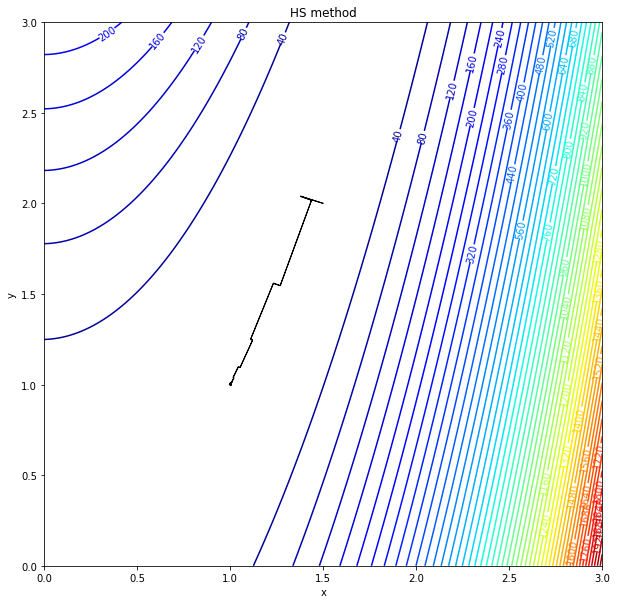

In [9]:
plot_path(path_HS,f,'HS method')

In [10]:
%%time
x,y = x0,y0
path_PR = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
rho = 0.75            # rho for backtracking
i=0                   # iteration count
dx = Df(x,y)          # current gradient
pk = -dx
while np.linalg.norm(dx)>tol and i<max_steps:    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5: # lower bound on alpha attempts to force Wolfe II
        alpha *= rho

    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    dx1 = Df(xnew,ynew)      # Df_{k+1}
    bk = PR_beta(dx,dx1)     # beta_k
    if i%2 == 0:     # restarting, uncomment to compare
        bk=0
    pk = -dx1 + bk*pk
    
    path_PR.append([xnew,ynew])
    x,y = xnew,ynew
    dx = dx1
    i += 1

path_PR=np.array(path_PR)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 8616 iterations, approximate minimum is 2.8846875084156853e-15 at (1.0000000530834712, 1.0000001078019694)
CPU times: user 1.41 s, sys: 14.6 ms, total: 1.42 s
Wall time: 1.41 s


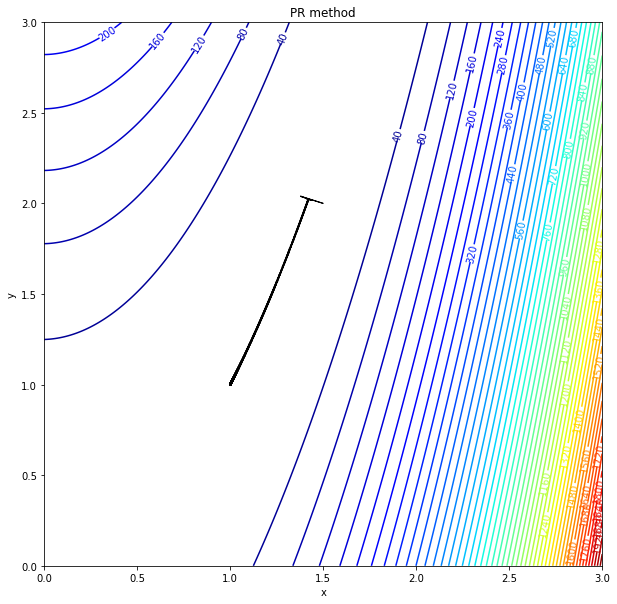

In [11]:
plot_path(path_PR,f,'PR method')

In [12]:
%%time
x,y = x0,y0
path_FR = [[x,y]]
tol = 1e-7            # stop when gradient is smaller than this amount
max_steps = 10000     # Maximum number of steps to run the iteration
rho = 0.75            # rho for backtracking
i=0                   # iteration count
dx = Df(x,y)          # current gradient
pk = -dx
while np.linalg.norm(dx)>tol and i<max_steps:    
    # backtracking
    alpha = 1
    while not WolfeI(alpha,f,np.array([x,y]),dx,pk) and alpha>1e-5: # lower bound on alpha attempts to force Wolfe II
        alpha *= rho

    xnew,ynew = x + alpha*pk[0], y + alpha*pk[1]
    dx1 = Df(xnew,ynew)      # Df_{k+1}
    bk = FR_beta(dx,dx1)  # beta_k
    if i%2 == 0:     # restarting, uncomment to compare
        bk=0
    pk = -dx1 + bk*pk
    
    path_FR.append([xnew,ynew])
    x,y = xnew,ynew
    dx = dx1
    i += 1

path_FR=np.array(path_FR)
print(f'After {i} iterations, approximate minimum is {f(x,y)} at {x,y}')

After 512 iterations, approximate minimum is 1.654668937994587e-15 at (1.0000000401718745, 1.0000000816226475)
CPU times: user 58.5 ms, sys: 4.59 ms, total: 63 ms
Wall time: 59.2 ms


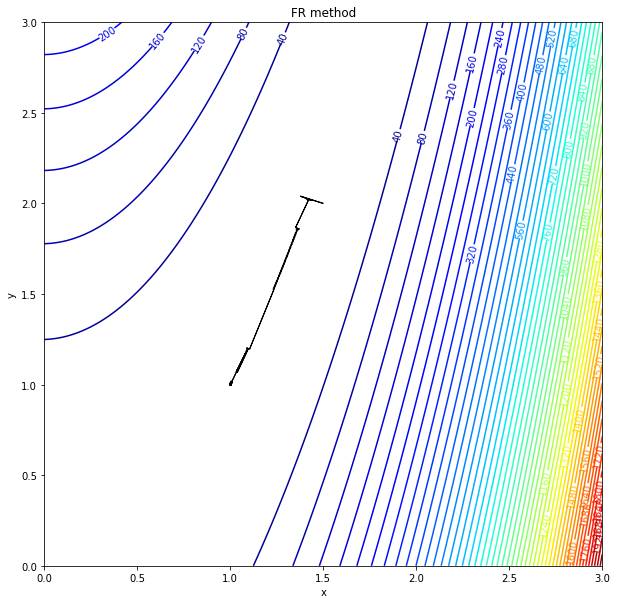

In [13]:
plot_path(path_FR,f,'FR method')